# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [79]:
# Importing necessary librabries for visualization, EDA, model building and evaluation.

# EDA and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Model building and evaluation
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings

warnings.filterwarnings("ignore")

sb.set_theme()

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.shape

(768, 9)

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

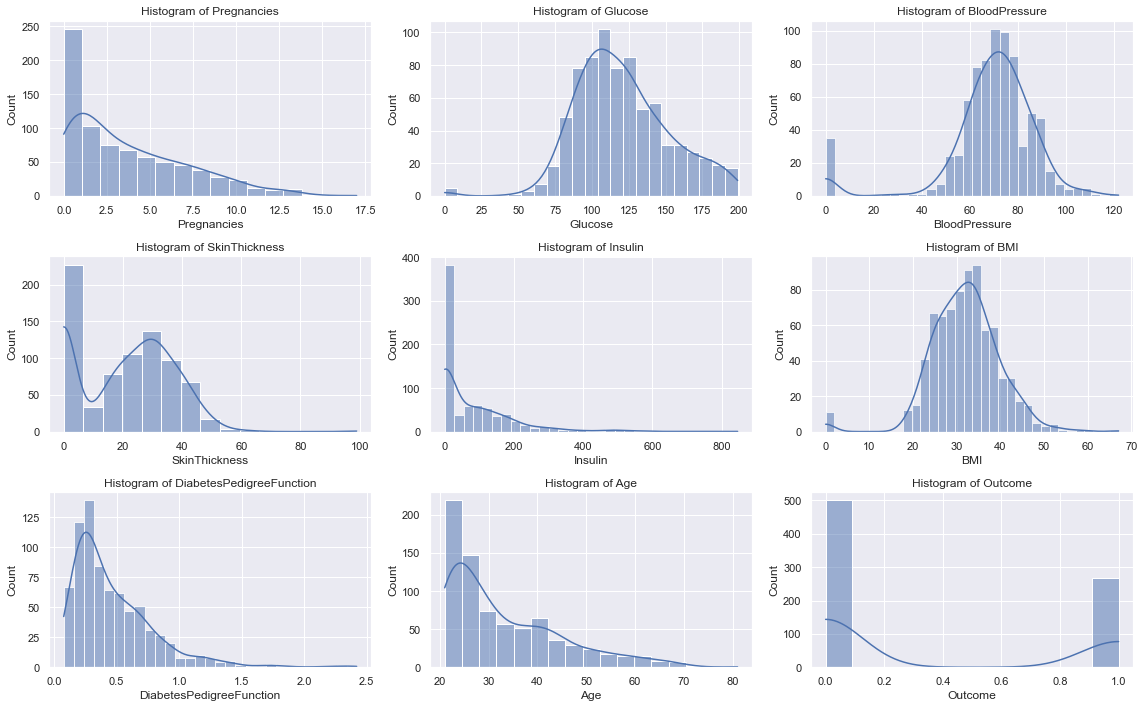

In [7]:
# Histogram distribution of dataset.

fig, axes = plt.subplots(3, 3, figsize=(16, 10))

axes = axes.flatten()

for i, column in enumerate(data.columns):
    ax = axes[i]
    sb.histplot(data[column], ax=ax, kde=True)
    ax.set_title('Histogram of '+ column)

plt.tight_layout()

>#### Pregnancies, Insulin, SkinThickness, Insulin, Age and DiabeterPedigreeFunction all seems to be right skewed.
>#### Glucose, BloodPressure and BMI all seems to be normally distributed. But have visible outliers

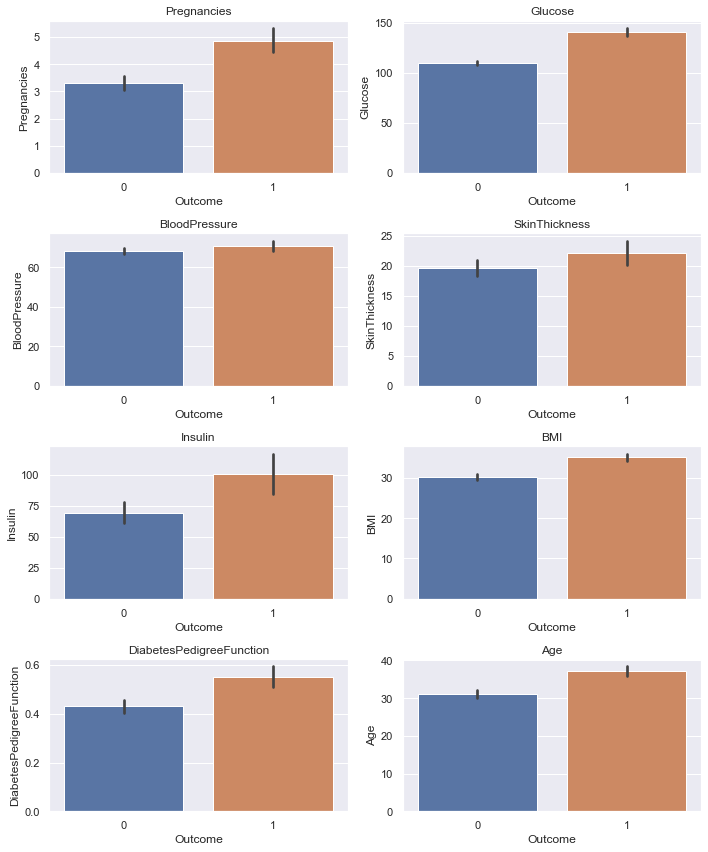

In [11]:
# Bar plots for understanding distribution of target label across the features.

fig, axes = plt.subplots(4, 2, figsize=(10, 12))

axes = axes.flatten()

for i, column in enumerate(data.columns[:-1]):
    ax = axes[i]
    sb.barplot(data=data[:-1], x='Outcome', y=column, ax=ax)
    ax.set_title(column)

plt.tight_layout()

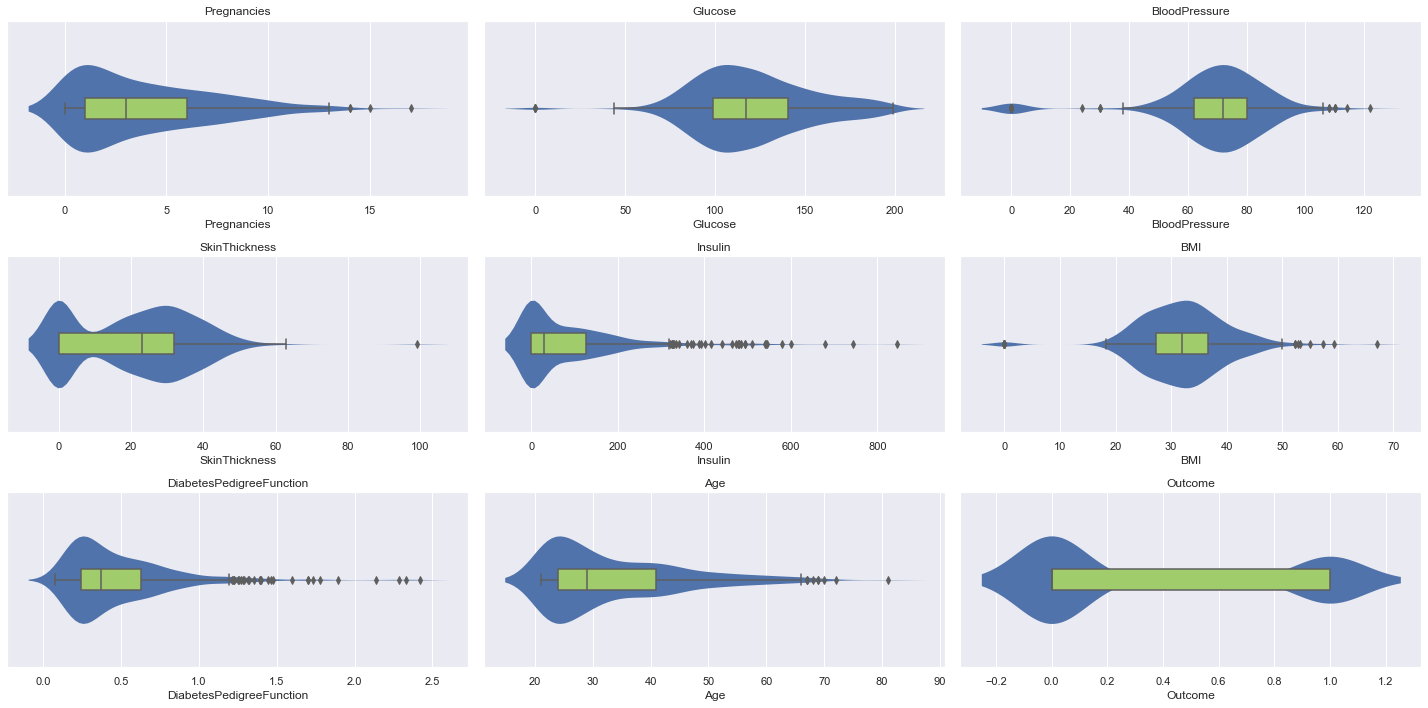

In [12]:
# Combination of both violin and box plots. Looking for outliers, as well as the distribution of the data.

fig, axes = plt.subplots(3, 3, figsize=(20, 10))

axes = axes.flatten()

for i, column in enumerate(data.columns):
    ax = axes[i]
    sb.violinplot(data[column], ax=ax, width=0.5, paletter='crest', 
                  inner=None, linewidth=0, saturation=0.9)
    sb.boxplot(data[column], saturation=0.5, width=0.12, palette='turbo', 
               boxprops={'zorder': 2}, ax=ax)
    ax.set_title(column)

plt.tight_layout()

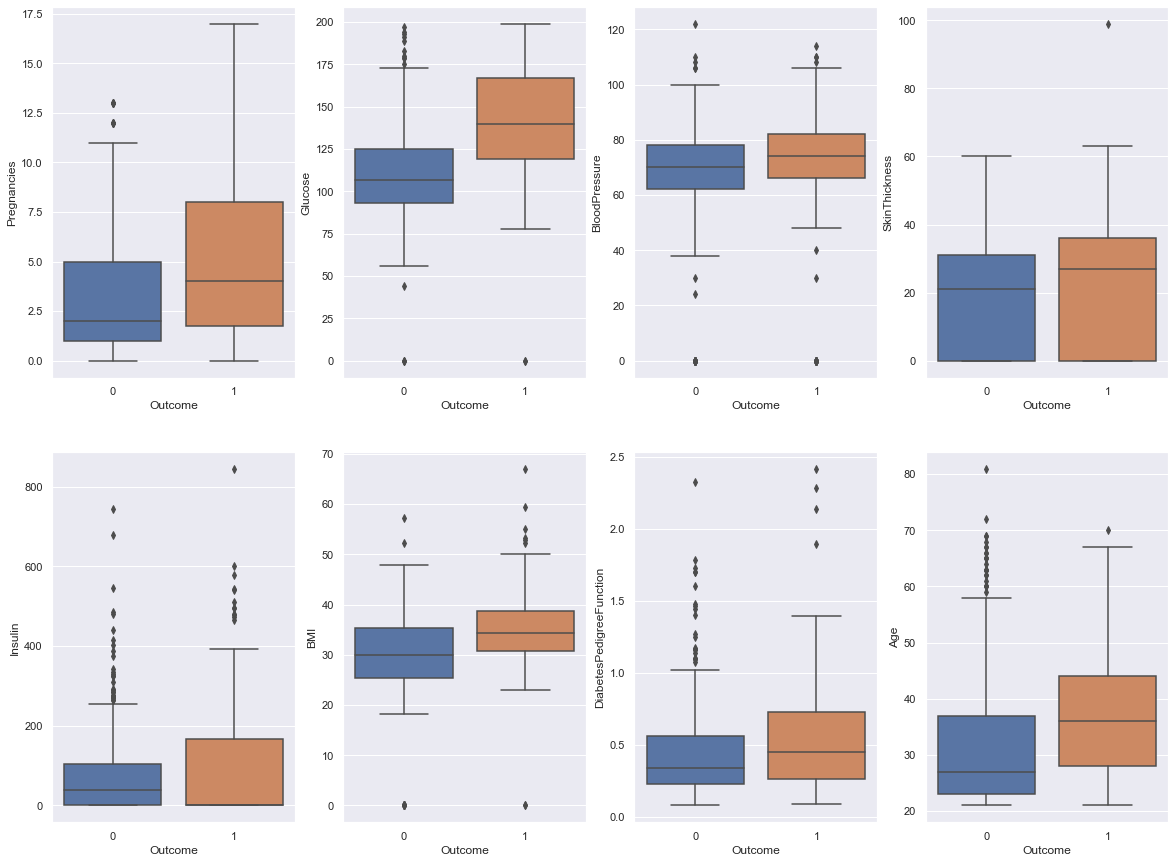

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 15))

axes = axes.flatten()
    
for i, column in enumerate(data.columns[:-1]):
    plt.sca(axes[i])
    sb.boxplot(x=data.columns[-1], y=column, data=data)

>#### There are a lot of outliers in all the independent variables excluding Pregnancies and SkinThickness. 
>#### They both have small outliers.

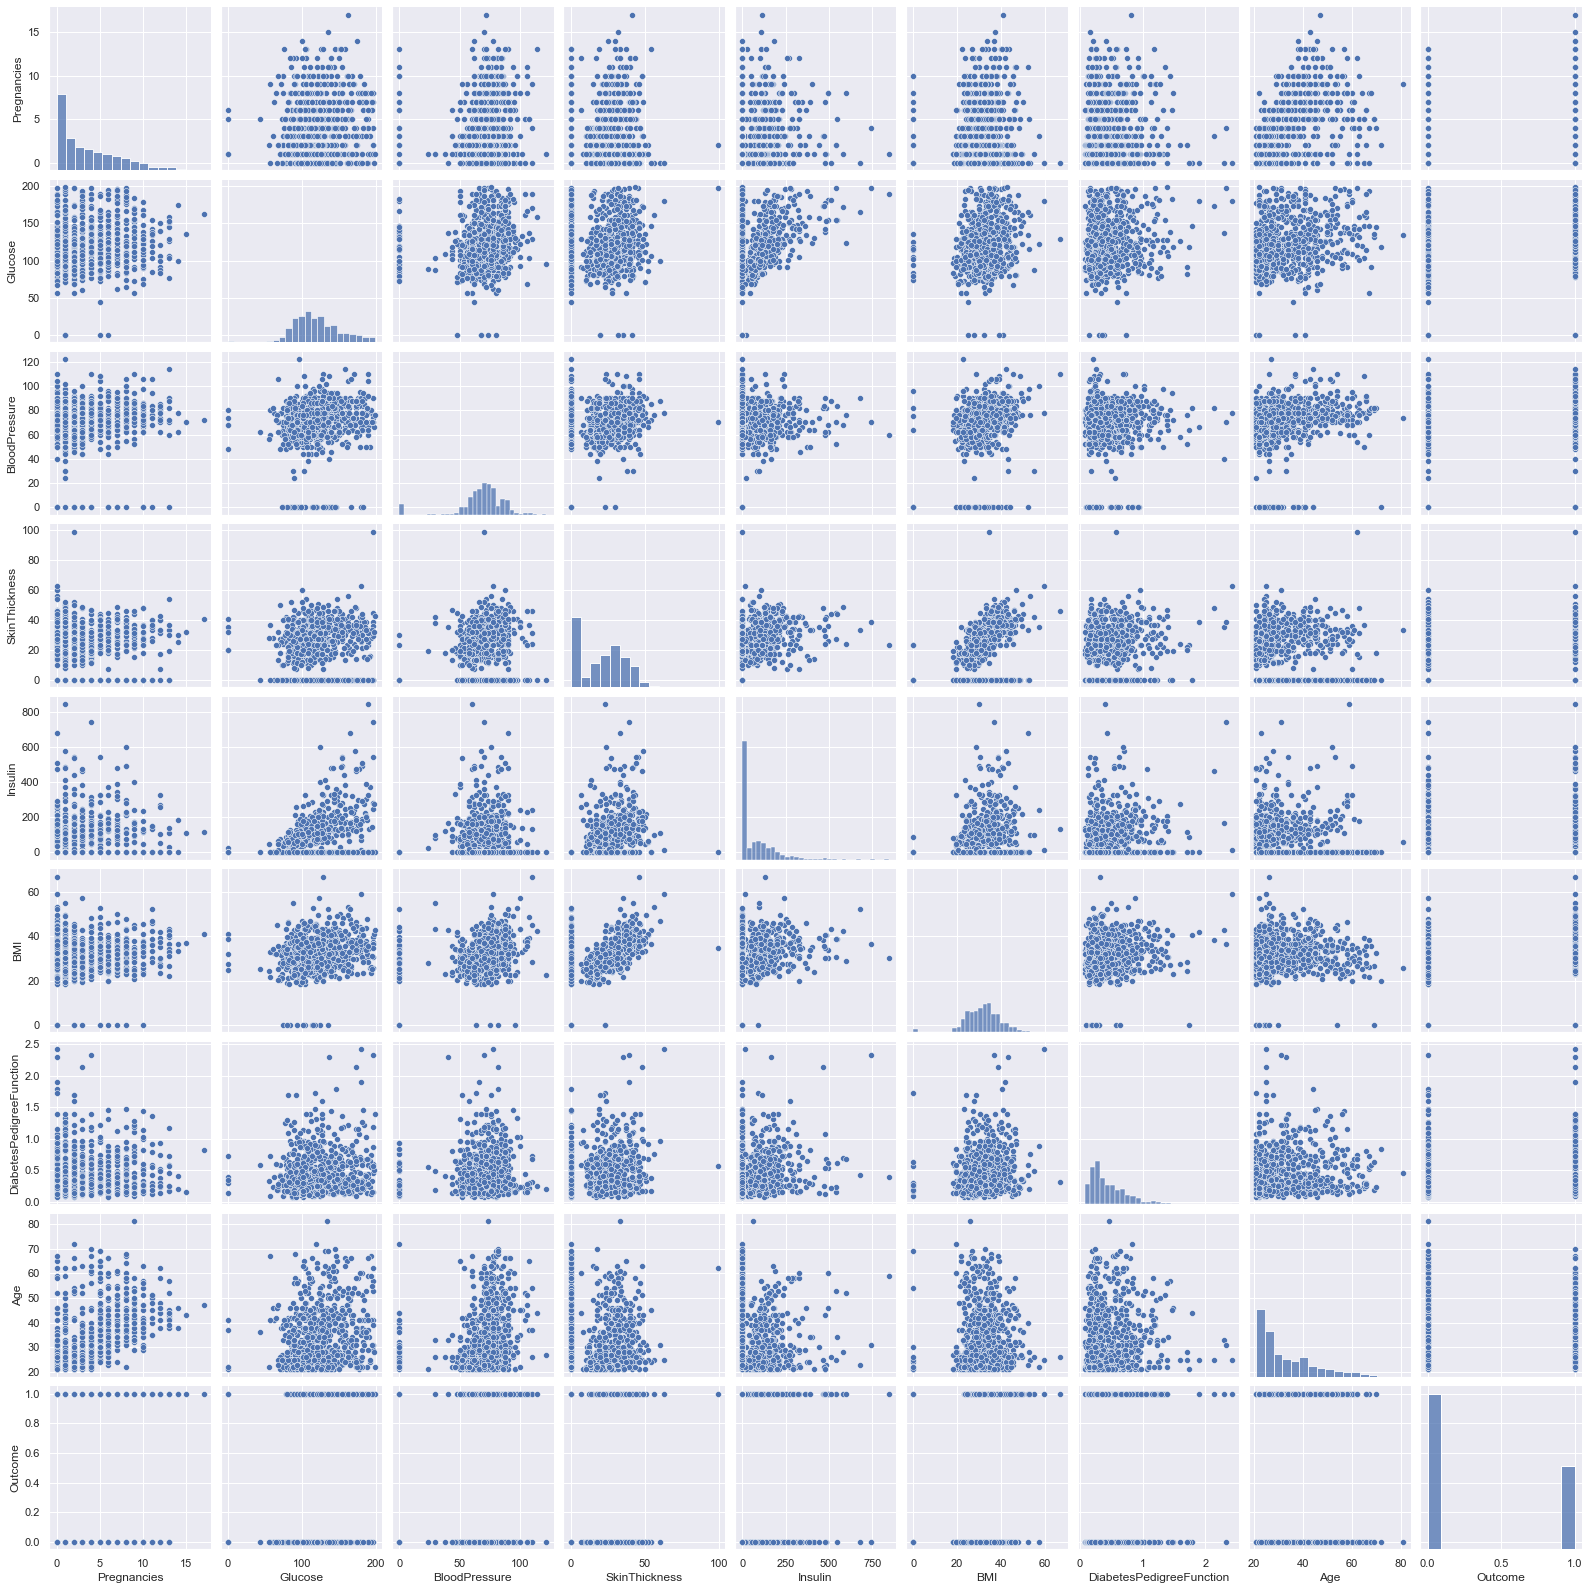

In [14]:
# Visualizing the correlation between features in an attempt to find relevant independent variables

sb.pairplot(data)

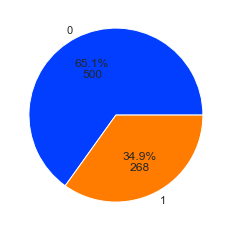

In [15]:
# Comparing the two different target classes and checking for class imbalance

target_sum = data['Outcome'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, target_sum*x/100)

palette_color = sb.color_palette('bright') 

plt.pie(data['Outcome'].value_counts().values, labels=data['Outcome'].value_counts().index, 
        autopct=fmt, colors=palette_color);

<AxesSubplot:xlabel='Outcome', ylabel='count'>

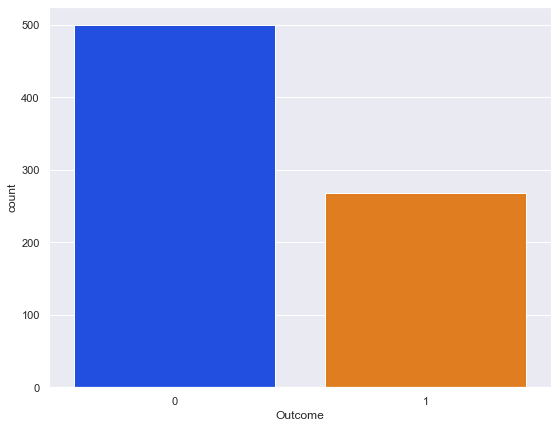

In [111]:
sb.countplot(x="Outcome", data=data, palette="bright")

In [17]:
# Analyzing the mean distribution for the features, by target ('Outcome').

data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [22]:
# In handling the outliers, since the outlier values in the entire dataframe is not consistent, removing them will greatly alter the consistency of the data quality. 
# Hence, I decided to clip them instead.

# Calculate lower and upper limits for clipping based on the entire dataset using IOR
q3 = data.quantile(0.25)
q1 = data.quantile(0.75)

upper_limit = q3 + 1.5 * (q3 - q1)
lower_limit = q1 - 1.5 * (q3 - q1)

clipped_df = data.copy()

for column in data.columns:
    clipped_df[column] = np.clip(data[column], lower_limit[column], upper_limit[column])

# Appending the target column 'Outcome' to the new DataFrame
clipped_df['Outcome'] = data['Outcome']
    

In [23]:
# Checking for duplicates in the data

clipped_df.duplicated().sum()

0

In [24]:
# Checking for missing values in the data

clipped_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
# Checking for class imbalance

clipped_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [26]:
# Descriptive statistics of the data

clipped_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,70.684896,20.511719,73.652669,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,14.197239,15.844744,93.576029,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,35.000000,0.000000,0.000000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,107.000000,80.000000,318.125000,50.550000,1.200000,66.500000,1.000000


In [27]:
# Count of zeros in each column

for column in clipped_df.columns[:-1]:
    print(f"Number of zeros in {column} is:",(clipped_df[column]==0).sum())

Number of zeros in Pregnancies is: 111
Number of zeros in Glucose is: 0
Number of zeros in BloodPressure is: 0
Number of zeros in SkinThickness is: 227
Number of zeros in Insulin is: 374
Number of zeros in BMI is: 0
Number of zeros in DiabetesPedigreeFunction is: 0
Number of zeros in Age is: 0


>#### Insulin cannot be zero. Zero Insulin means the person is dead already. These values are missing values and not technically 0.
>#### It was filled with their respective average values. Pregnancies being zero means the lady hasn't given birth to a child yet. SkinThickness being 0 simply means that the lady is perfectly healthy and doesn't have diabetes signs or symptoms.

In [28]:
# Addressing missing values by calculating the mean of the insulin feature

mean_without_zeros = clipped_df[clipped_df['Insulin'] != 0]['Insulin'].mean()

# Filling zeros with the calculated mean
clipped_df['Insulin'] = clipped_df['Insulin'].replace(0, mean_without_zeros)

In [29]:
# Checking for correlation between independent variables and target

clipped_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,0.086114,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.442825,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.077408,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.094496,0.401494,0.177920,-0.119170,0.073125
Insulin,0.086114,0.442825,0.077408,0.094496,1.000000,0.188659,0.086925,0.153769,0.243489
BMI,0.024681,0.235542,0.282544,0.401494,0.188659,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.086925,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,0.153769,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.243489,0.309739,0.184969,0.242702,1.000000


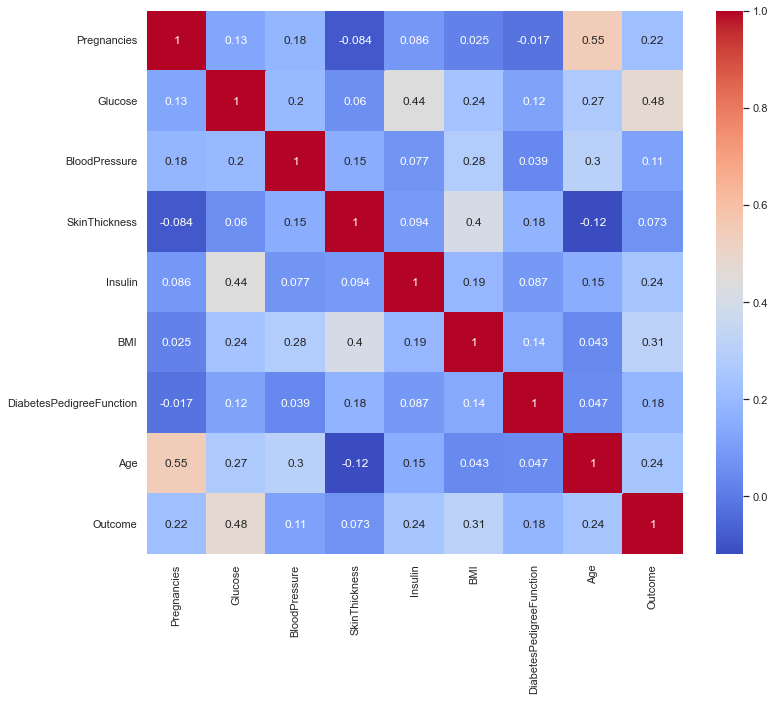

In [113]:
# Graphical representation of correlation between variables for feature selection

# Setting figure size
sb.set(rc={"figure.figsize":(12, 10)})

sb.heatmap(clipped_df.corr(), annot=True, cmap='coolwarm')
plt.show()

>#### SkinThickness is weakly correlated with Outcome. Hence, it is not a vital feature and can be removed from before training the model.

In [80]:
# Assigning features and target, for model training.

X = clipped_df.drop('Outcome', axis=1)
y = clipped_df['Outcome']

In [81]:
# The dataset was normalized because the data does not follow a Gaussian distribution.

normalize = MinMaxScaler()
normalized_data = normalize.fit_transform(X)

# The dataset is now scaled using the StandardScaler.
normalize = StandardScaler()
normalized_data = normalize.fit_transform(X)

In [82]:
# Stratify is used to reduce the class imbalance in the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=clipped_df['Outcome'])

In [83]:
X_train.shape, y_train.shape

((614, 8), (614,))

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

## Random Forest Classifier algorithm

In [84]:
# create the classifier with n_estimators = 100
clf_rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
# Calculating the feature scores

feature_scores = pd.Series(clf_rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Glucose                     0.261298
BMI                         0.165604
DiabetesPedigreeFunction    0.129219
Age                         0.120582
BloodPressure               0.087885
Insulin                     0.085584
Pregnancies                 0.080355
SkinThickness               0.069473
dtype: float64

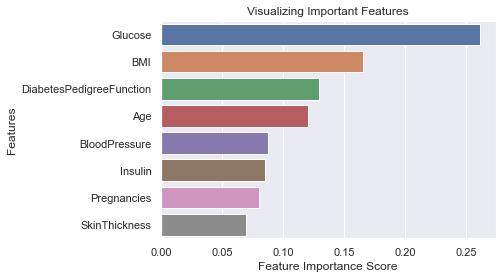

In [86]:
# Creating a seaborn bar plot of feature importance

sb.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [87]:
# The above plot further confirms that SkinThickness is not correlated with the Outcome. Hence it will be dropped from further model training. 
# Other features such as Pregnancies, Insulin and BloodPressure also had low feature scores, but there is more than one statistical evidence that SkinThickness is not
# correlated with the target variable, Outcome.

X_train = X_train.drop('SkinThickness', axis=1)
X_test = X_test.drop('SkinThickness', axis=1)

In [88]:
# Proceeding to instantiate the classifier with n_estimators = 100
clf_rfc = RandomForestClassifier(random_state=42)

# Fitting the model to the training set
clf_rfc.fit(X_train, y_train)

# Predicting the test set results
y_pred = clf_rfc.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7597


Confusion Matrix for model validation


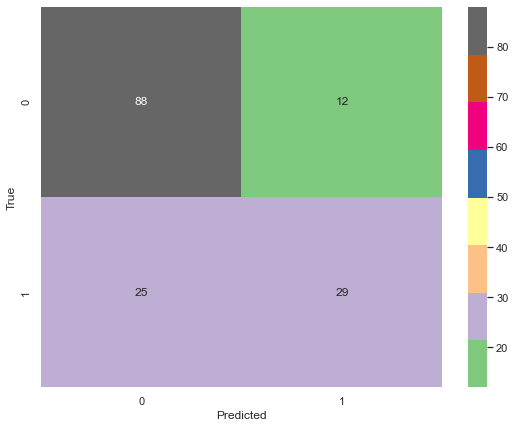

In [108]:
print('Confusion Matrix for model validation')
cm = confusion_matrix(y_test, y_pred, labels=clf_rfc.classes_)

# Setting figure size
sb.set(rc={"figure.figsize":(9, 7)})

# Plot the confusion matrix
sb.heatmap(cm, annot=True, fmt="d", cmap="Accent")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [90]:
# Model performance evaluation results before hyperparameter tuning and grid search optimization

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.70      0.56      0.62        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



### Hyperparameter tuning and model training

In [91]:
grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [2, 3, 5, 10, 20],
    'criterion': ["gini", "entropy", "log_loss"]
}

In [92]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf_rfc, 
                           param_grid=grid, 
                           n_jobs=-1, verbose=1)

In [93]:
# Fitting the grid search for optimized parameters to the training model.

grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   38.5s finished


In [94]:
# Finding the best parameters for optimal model performance.

rfc_best_model = grid_search.best_estimator_
rfc_best_model

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200,
                       random_state=42)

In [95]:
grid_search.best_score_

0.7834466213514595

In [96]:
# Proceeding to instantiate the classifier with n_estimators = 100
clf_rfc = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200, random_state=42)

# Fitting the model to the training set
clf_rfc.fit(X_train, y_train)

# Predicting the test set results
y_pred = clf_rfc.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7597


In [125]:
# Accessing feature scores obtained from tuned Random Forest model

feature_scores = pd.DataFrame(clf_rfc.feature_importances_, index=X_train.columns)
feature_scores = feature_scores.rename(columns={0: "Weight"}).sort_values(by='Weight', ascending=False)
feature_scores

,Weight
Glucose,0.344521
BMI,0.194243
Age,0.135474
Insulin,0.113194
DiabetesPedigreeFunction,0.095114
Pregnancies,0.064750
BloodPressure,0.052704


Confusion Matrix for best model


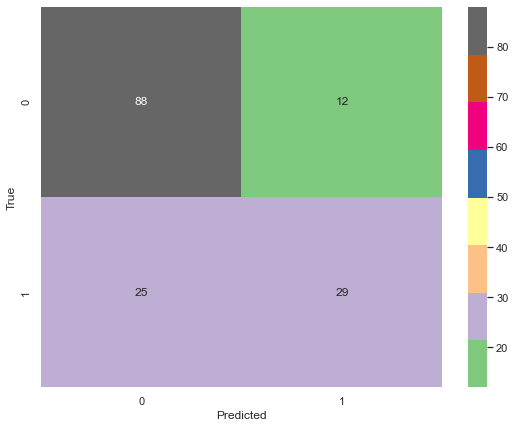

In [109]:
print('Confusion Matrix for best model')
cm = confusion_matrix(y_test, grid_search.predict(X_test), labels=grid_search.classes_)

# Setting figure size
sb.set(rc={"figure.figsize":(9, 7)})

# Plot the confusion matrix
sb.heatmap(cm, annot=True, fmt="d", cmap="Accent")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [98]:
# Model performance evaluation results

print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       100
           1       0.71      0.54      0.61        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, grid_search.predict(X_test))
recall = recall_score(y_test, grid_search.predict(X_test))
f1 = f1_score(y_test, grid_search.predict(X_test))

print(f"Precision: {round(precision*100, 2)}%")
print(f"Recall: {round(recall*100, 2)}%")
print(f"F1 Score: {round(f1*100, 2)}%")

Precision: 70.73%
Recall: 53.7%
F1 Score: 61.05%


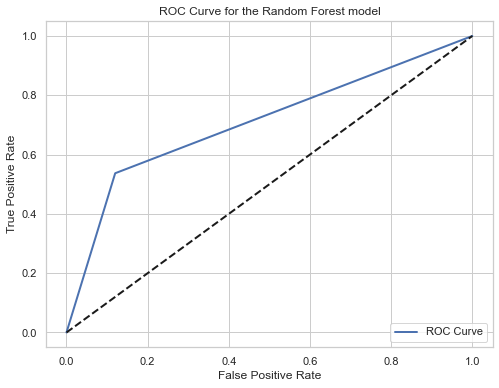

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))

plt.figure(figsize=(8, 6))
sb.set_style("whitegrid")

# Plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the Random Forest model')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [101]:
# Calculate and print the ROC AUC score

auc_score = roc_auc_score(y_test, grid_search.predict(X_test))
print(f"AUC ROC Score for the tuned Random Forest model is: {round(auc_score*100, 2)}%")

AUC ROC Score for the tuned Random Forest model is: 70.85%


## eXtreme Gradient Boosting algorithm

In [60]:
# Classification matrices for XGBoost algorithm

dtrain_clf = xgb.DMatrix(X_train, y_train)
dtest_clf = xgb.DMatrix(X_test, y_test)

In [61]:
params = {"learning_rate": 0.2, 
          "objective": "binary:logitraw", 
          "tree_method": "gpu_hist", 
          "eval_metric": ["mae", "logloss", "auc"]}
n = 1000

In [62]:
results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   verbose_eval=100,
   early_stopping_rounds=30,
   seed=42,
)

[0]	train-mae:0.25876+0.00720	train-logloss:0.40953+0.00670	train-auc:0.88900+0.00541	test-mae:0.32345+0.01915	test-logloss:0.58310+0.04664	test-auc:0.74925+0.04870
[47]	train-mae:2.57571+0.10176	train-logloss:0.10105+0.04570	train-auc:0.99998+0.00003	test-mae:2.49413+0.28553	test-logloss:7.60080+0.78221	test-auc:0.80122+0.03211


In [63]:
results.keys()

Index(['train-mae-mean', 'train-mae-std', 'train-logloss-mean',
       'train-logloss-std', 'train-auc-mean', 'train-auc-std', 'test-mae-mean',
       'test-mae-std', 'test-logloss-mean', 'test-logloss-std',
       'test-auc-mean', 'test-auc-std'],
      dtype='object')

In [64]:
print(f"The largest AUC score is {round(results['test-auc-mean'].max() * 100, 2)}%")
(f"The smallest AUC score is {round(results['test-auc-mean'].min() * 100, 2)}%")

The largest AUC score is 81.21%


'The smallest AUC score is 74.93%'

In [65]:
results.head()

,train-mae-mean,train-mae-std,train-logloss-mean,train-logloss-std,train-auc-mean,train-auc-std,test-mae-mean,test-mae-std,test-logloss-mean,test-logloss-std,test-auc-mean,test-auc-std
0,0.258764,0.007200,0.409533,0.006702,0.888999,0.005407,0.323452,0.019150,0.583102,0.046639,0.749254,0.048696
1,0.316684,0.006229,1.524643,0.167713,0.921305,0.005187,0.399491,0.025173,3.692781,0.722891,0.784652,0.037570
2,0.455403,0.007525,2.187656,0.221530,0.931681,0.005089,0.536230,0.038594,4.874476,1.019282,0.799251,0.045916
3,0.587740,0.010338,2.349301,0.236439,0.944307,0.003462,0.675031,0.038961,5.398257,1.235637,0.798238,0.052749
4,0.714349,0.012226,2.390542,0.314569,0.949602,0.004947,0.798633,0.039662,5.516565,0.900712,0.802202,0.047967


>#### Without hyperparameter tuning, the XGBoost algorithm has given far better results than the Random Forest Classifier algorithm.
>#### We will go ahead to tune the hyperparameters for better estimates

In [66]:
xgb_params = {'learning_rate':[0.1,0.01,0.3],
              'subsample':[0.8,0.9,1], 
             'max_delta_step':[0,1,2,4], 
             'max_depth':[3,4,5,6,7],
             'n_estimators':[100,200,300,400,500]}

In [67]:
csv = GridSearchCV(xgb.XGBClassifier(), xgb_params, scoring = 'f1', cv = 5, n_jobs=-1)
csv.fit(X_train, y_train)

[23:44:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [68]:
print(f"The best paarameters to be used in the tuned model are: {csv.best_params_}")

The best paarameters to be used in the tuned model are: {'learning_rate': 0.01, 'max_delta_step': 1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


In [69]:
final_params = {'learning_rate': 0.01, 
                'subsample': 0.8,
                'n_estimators': 300, 
                'objective': 'binary:logitraw', 
                'max_depth': 3, 
                'max_delta_step':0}

# Training the final model using optimal hyperparameters
xgb_tuned_model = xgb.train(final_params, dtrain_clf, num_boost_round = 100)

[23:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:48:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.4.0, the default evaluation metric used with the objective 'binary:logitraw' was changed from 'auc' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
# Viewing the weights of the features on the Outcome

feature_scores = xgb_tuned_model.get_score(importance_type='weight')

pd.DataFrame(list(feature_scores.items()), columns=['Feature', 'Weight']).sort_values(by='Weight', ascending=False)

,Feature,Weight
1,Glucose,194.0
4,BMI,173.0
6,Age,103.0
5,DiabetesPedigreeFunction,92.0
3,Insulin,53.0
0,Pregnancies,40.0
2,BloodPressure,14.0


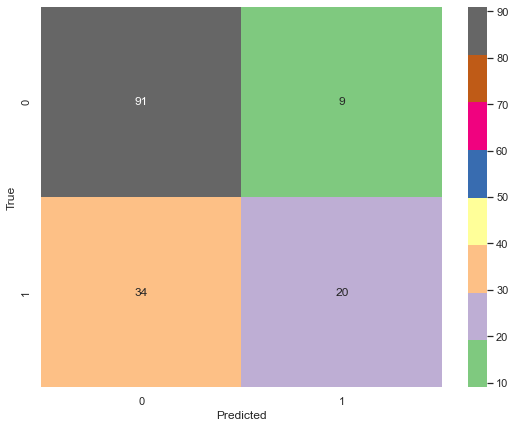

In [110]:
y_pred = xgb_tuned_model.predict(dtest_clf)
y_true = dtest_clf.get_label()

cm = confusion_matrix(y_true, (y_pred > 0.5).astype(int))

# Setting figure size
sb.set(rc={"figure.figsize":(9, 7)})

# Plot the confusion matrix
sb.heatmap(cm, annot=True, fmt="d", cmap="Accent")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [72]:
# Model performance evaluation results
y_pred_binary = (y_pred > 0.5).astype(int)

print(classification_report(y_true, y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81       100
         1.0       0.69      0.37      0.48        54

    accuracy                           0.72       154
   macro avg       0.71      0.64      0.65       154
weighted avg       0.71      0.72      0.69       154



In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)

print(f"Precision: {round(precision*100, 2)}%")
print(f"Recall: {round(recall*100, 2)}%")
print(f"F1 Score: {round(f1*100, 2)}%")

Precision: 68.97%
Recall: 37.04%
F1 Score: 48.19%


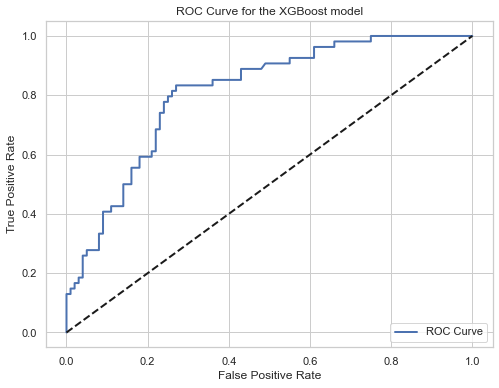

In [75]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

plt.figure(figsize=(8, 6))
sb.set_style("whitegrid")

# Plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for the XGBoost model')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [76]:
# Calculate and print the ROC AUC score

auc_score = roc_auc_score(y_true, y_pred)
print(f"AUC ROC Score for the tuned XGBoost model is: {round(auc_score*100, 2)}%")

AUC ROC Score for the tuned XGBoost model is: 80.92%


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- The data contains a lot of missing values that were captured as 0.
- The data contains a lot of outliers that were treated using the clipping method.
- The Random Forest Classifier model has a precision of 70.73%, 53.7% recall and an f1 score of 61.05%. This were the evaluation metrics obtained after tuning the hyperparameters of the model. It has an AUC score of 70.85%.
- The eXtreme Gradient Boosting model has a precision of 68.97%, 37.04% recall and f1 score of 48.19%. This were the evaluation metrics of the model after hyperparameter tuning. It has an AUC score of 80.92%.

>#### The model evaluation metrics clearly shows that the Random Forest model is better suited for predicting the diabetes disease compared to the XGBoost model. Hence, I'll recommend this model to be built into the model deployment pipeline for commercial or industrial production.